# Klasifikacija zloćudnog i dobroćudnog tumora dojke pomoću algoritama strojnog učenja


In [2]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


# 1. Uvod

Link članka: https://ieeexplore.ieee.org/document/9445249

Link dataseta: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

## Problem
Rak dojke jedan je najčešći zloćudni tumor kod žena. Nastaje kad normalne žljezdane stanice dojke promijene svojstva te počnu nekontrolirano rasti, umnožavati se i uništavati okkolno zdravo tkivo. Rak dojke je rezultat nekontroliranog rasta tkiva, tj. tumora. Tumor ne znači rak, tumor može biti dobroćudni i zloćudni. Testovi poput MRI, mamografa i ultrazvuka koriste se za dijagnozu raka dojke. 

## Informacije o podatkvonom skupu
Koristimo podatkvoni skup "Wisconsin Diagnostic Breast Cancer (WDBC)". Kreirao ga je Dr. William H. Wolberg, fizijatar na Sveučilištu Wisconsin-Madison. Za izradu je koristio uzorke 
Značajke su izračunate iz digitalizirane slike aspirata dojke tankom iglom. Te značajke opisuju karakteristike staničnih jezgri prisutnih na slici. Jedan primjer takve slike je sljedeći:

<a href="https://www.researchgate.net/figure/A-magnified-image-of-a-malignant-breast-fine-needle-aspirate-Visible-cell-nuclei-are_fig1_311950799"><img src="https://www.researchgate.net/profile/Lucas-Borges-13/publication/311950799/figure/fig1/AS:444458983530496@1482978687857/A-magnified-image-of-a-malignant-breast-fine-needle-aspirate-Visible-cell-nuclei-are.png" alt="A magnified image of a malignant breast fine needle aspirate. Visible cell nuclei are outlined by a curve-fitting program. The Xcyt system also compares various features for each nucleus."/></a>

<cite>
Borges, Lucas. (2015). Analysis of the Wisconsin Breast Cancer Dataset and Machine Learning for Breast Cancer Detection. 
</cite>


Broj primjera: 569  
Broj atributa: 32 (ID, dijagnoza, 30 realnih značajki)  
Distribucija klasa: 357 dobroćudnih, 212 zloćudnih

## Opis značajki
+ 1) ID broj
+ 2) Dijagnoza: M = malignant (zloćudan) / B = benign (dobroćudan)  
+ 3-32) Deset realnih značajki izračunatih za stanične jezgre na slikama:
    + a) radijus (prosjek udaljenosti od centra do točki na granici jezgre)
    + b) tekstura (standardna devijacija sivo-bijelih vrijednosti)
    + c) opseg
    + d) površina
    + e) glatkoća (lokalna varijacija radijusa)
    + f) kompaktnost (opseg^2 / površina -  1.0)
    + g) konkavnost (intenzitet konkavnih dijelova konture)
    + h) konkavne točke (broj konkavnih dijelova konture)
    + i) simetrija (Razlika u duljini između linija okomitih na veliku os u oba smjera granice stanice)
    + j) fraktalna dimenzija ("aproksimacija obale". Veća vrijednost dovodi do manje normalne konture što predstavlja veći rizik zloćudnog tumora)

Srednja vrijednost, standardna pogreška i "najgora" ili najveća (srednja vrijednost od tri
najveće vrijednosti) ovih značajki izračunate su za svaku sliku,
što rezultira s 30 značajki. Na primjer, polje 3 je Srednji polumjer, polje
13 je radijus SE, polje 23 je najgori radijus.

Sve vrijednosti značajki su kodirane s četiri značajne znamenke.


# 2. Učitavanje i analiza podatkovnog skupa

Podatkovni skup učitavamo iz CSV dokumenta pomoću pandas bibilioteke.

In [3]:
# učitavanje CSV podataka, header je postavljen na None, jer inače podatke iz prvog retka postavlja kao imena stupaca
data = pd.read_csv('wdbc.data', header=None)
pd.set_option('display.max_columns', None) # prikazivanje svih stupaca
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Podatkovni skup ima **569 redaka** i **32 stupca**.

In [4]:
n_examples, n_features = data.shape
print(f'Broj primjera u skupu za podatke = {n_examples}\nBroj značajki = {n_features}')

Broj primjera u skupu za podatke = 569
Broj značajki = 32


Postavljamo imena značajki jer ih nismo dobili u CSV fajlu, već u drugom fajlu koji opisuje svaki redni broj značajke.

In [5]:
# pomoćna funkcija za generiranje columns dict (za mjenjanje imena značajki)
GENERIRAJ = False
if GENERIRAJ:
    for i in range(32):
        if i < 2:
            if i == 0:
                col_name = 'ID'
            else: 
                col_name = 'Diagnosis'
            print(f'\t\t{i}: "{col_name}",')
            continue
        
        names = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness',
            'Compactness', 'Concavity', 'Concave points', 'Symmetry', 'Fractal division']
        
        sufixes = ['Mean', 'SE', 'Worst']
        
        name_index = int((i-2) % 10)
        sufix_index = int((i-2) / 10)
        
        print(f'\t\t{i}: "{names[name_index]} {sufixes[sufix_index]}",')


# postavljanje imena značajki
data.rename(columns={
		0: "ID",
		1: "Diagnosis",
		2: "Radius Mean",
		3: "Texture Mean",
		4: "Perimeter Mean",
		5: "Area Mean",
		6: "Smoothness Mean",
		7: "Compactness Mean",
		8: "Concavity Mean",
		9: "Concave points Mean",
		10: "Symmetry Mean",
		11: "Fractal division Mean",
		12: "Radius SE",
		13: "Texture SE",
		14: "Perimeter SE",
		15: "Area SE",
		16: "Smoothness SE",
		17: "Compactness SE",
		18: "Concavity SE",
		19: "Concave points SE",
		20: "Symmetry SE",
		21: "Fractal division SE",
		22: "Radius Worst",
		23: "Texture Worst",
		24: "Perimeter Worst",
		25: "Area Worst",
		26: "Smoothness Worst",
		27: "Compactness Worst",
		28: "Concavity Worst",
		29: "Concave points Worst",
		30: "Symmetry Worst",
		31: "Fractal division Worst"
    }, 
    inplace=True)


Sada možemo prikazati i imena značajki.

In [6]:
data.columns.values

array(['ID', 'Diagnosis', 'Radius Mean', 'Texture Mean', 'Perimeter Mean',
       'Area Mean', 'Smoothness Mean', 'Compactness Mean',
       'Concavity Mean', 'Concave points Mean', 'Symmetry Mean',
       'Fractal division Mean', 'Radius SE', 'Texture SE', 'Perimeter SE',
       'Area SE', 'Smoothness SE', 'Compactness SE', 'Concavity SE',
       'Concave points SE', 'Symmetry SE', 'Fractal division SE',
       'Radius Worst', 'Texture Worst', 'Perimeter Worst', 'Area Worst',
       'Smoothness Worst', 'Compactness Worst', 'Concavity Worst',
       'Concave points Worst', 'Symmetry Worst', 'Fractal division Worst'],
      dtype=object)

# Tipovi podataka

Tipovi podataka koji postoje su: **int64**, **object** i **float64**. 

**ID** je tipa integer.  
**Diagnosis** je zapravo character koji može biti **M** ili **B** (malignant ili benign). Broj **dobroćudnih** primjera je **357**, a **zloćudnih** **212**, odnosno **62.74%** **dobroćudnih** i **37.26%** **zloćudnih**.  
Ostalih 30 stupaca sadrži realne brojeve koji imaju preciznost na 4 decimalna mjesta.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      569 non-null    int64  
 1   Diagnosis               569 non-null    object 
 2   Radius Mean             569 non-null    float64
 3   Texture Mean            569 non-null    float64
 4   Perimeter Mean          569 non-null    float64
 5   Area Mean               569 non-null    float64
 6   Smoothness Mean         569 non-null    float64
 7   Compactness Mean        569 non-null    float64
 8   Concavity Mean          569 non-null    float64
 9   Concave points Mean     569 non-null    float64
 10  Symmetry Mean           569 non-null    float64
 11  Fractal division Mean   569 non-null    float64
 12  Radius SE               569 non-null    float64
 13  Texture SE              569 non-null    float64
 14  Perimeter SE            569 non-null    fl

([<matplotlib.patches.Wedge at 0x20a7fc9e670>,
 [Text(-0.42865488965309717, 1.0130424401655103, 'B'),
  Text(0.42865498450097356, -1.0130424000319387, 'M')],
 [Text(-0.2338117579925984, 0.5525686037266418, '62.74'),
  Text(0.23381180972780374, -0.5525685818356029, '37.26')])

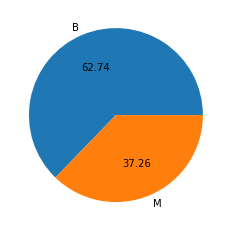

In [8]:
count_per_diagnosis = data.groupby('Diagnosis').count().loc[:, 'ID'].values
title_name = data.groupby('Diagnosis').count().index.values
percent = (count_per_diagnosis / len(data)) * 100
plt.pie(percent, labels=title_name, autopct='%.2f')

**ID** je samo jedinstveni identifikator za određeni primjer. Taj podatak nam ne donosi nikakve korisne informacije za analizu podataka, pa ćemo ga izbaciti.

In [9]:
data.drop(['ID'], axis=1, inplace=True)
data.head()

,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal division Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal division SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal division Worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Napravi ćemo i skup podataka gdje će **Dijagnoza** biti numerička varijabla. **0** za **dobroćudni** tumor, a **1** za **zloćudni**.

In [23]:
data_with_numeric_diagnosis = data.copy()
data_with_numeric_diagnosis['Diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)
data_with_numeric_diagnosis

,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal division Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal division SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal division Worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Nedostajući podaci

Provjeravamo postoje li nedostajući podaci. U našem slučaju ne postoje takvi podaci.

In [10]:
(data.isna().sum() != 0).sum()

0

# Vizualizacija i analiza podataka

In [11]:
data

,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal division Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal division SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal division Worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Histogram značajki

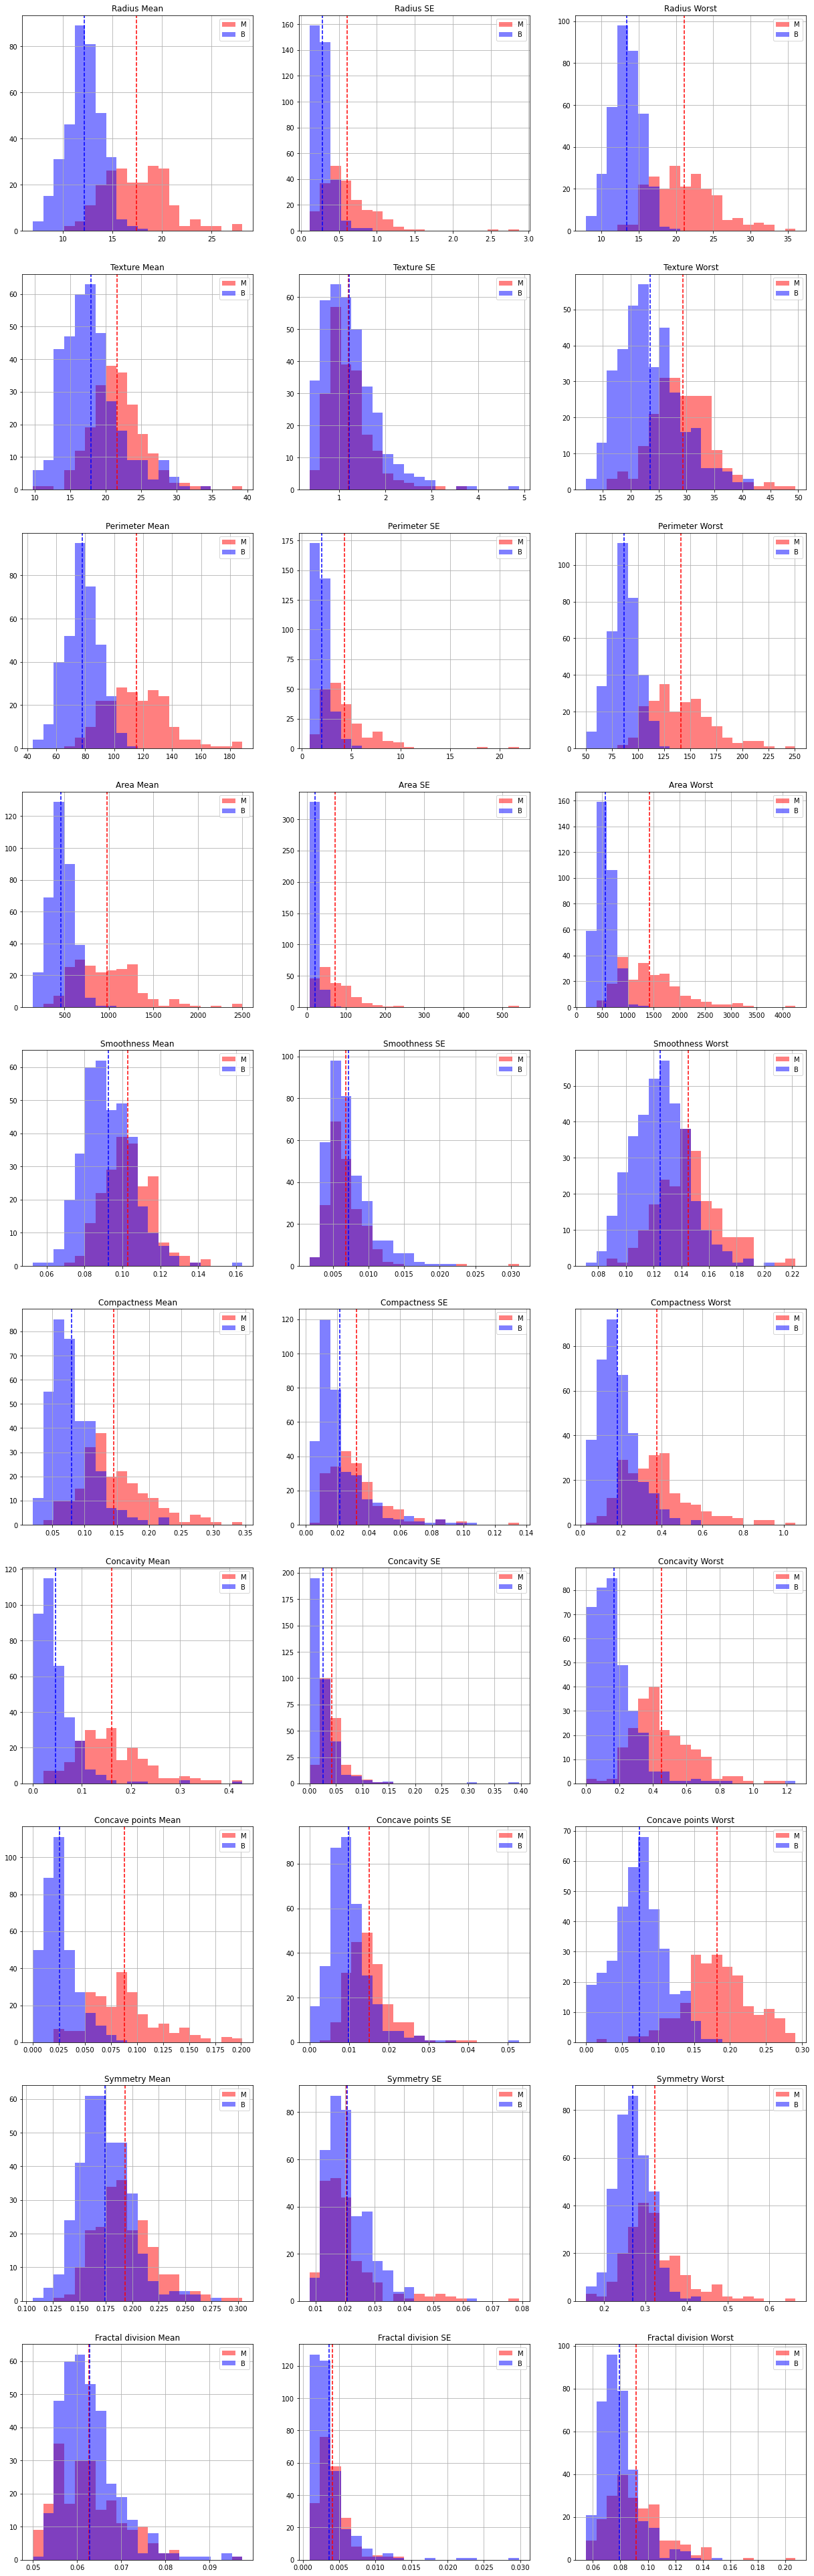

In [12]:
def plot_hist_feature_by_diagnosis(ax, feature_name):
    feature_min = data[feature_name].min() # moramo ograničiti range histograma na (min, max) kako bi širina stupca bila jednaka za obje dijagnoze
    feature_max = data[feature_name].max()
    ax.hist(data.loc[data['Diagnosis']=='M', feature_name], bins=20, alpha=0.5, color='red', label='M', range=(feature_min, feature_max))
    ax.hist(data.loc[data['Diagnosis']=='B', feature_name], bins=20, alpha=0.5, color='blue', label='B', range=(feature_min, feature_max))
    ax.axvline(data.loc[data['Diagnosis']=='M', feature_name].mean(), color='red', linestyle='dashed')
    ax.axvline(data.loc[data['Diagnosis']=='B', feature_name].mean(), color='blue', linestyle='dashed')
    ax.set_title(feature_name)
    ax.legend(loc='best')
    ax.grid()

fig, ax = plt.subplots(10, 3, figsize=(21, 70))
for i, column_name in enumerate(data.columns[1:]):
    plt_row = i % 10
    plt_col = int(i / 10)
    plot_hist_feature_by_diagnosis(ax[plt_row, plt_col], column_name)

Dobru **separaciju po vrsti tumora** imamo kod značajki: **Radius**, **Perimeter**, **Concavity**, **Concave points** (Tu se misli na skup od 3 značajke: Mean, SE, Worst)  
Jako **sličnu distribuciju** imaju značajke: **Texture SE**, **Symmetry SE**, **Fractal division Mean**

### Boxplot značajki

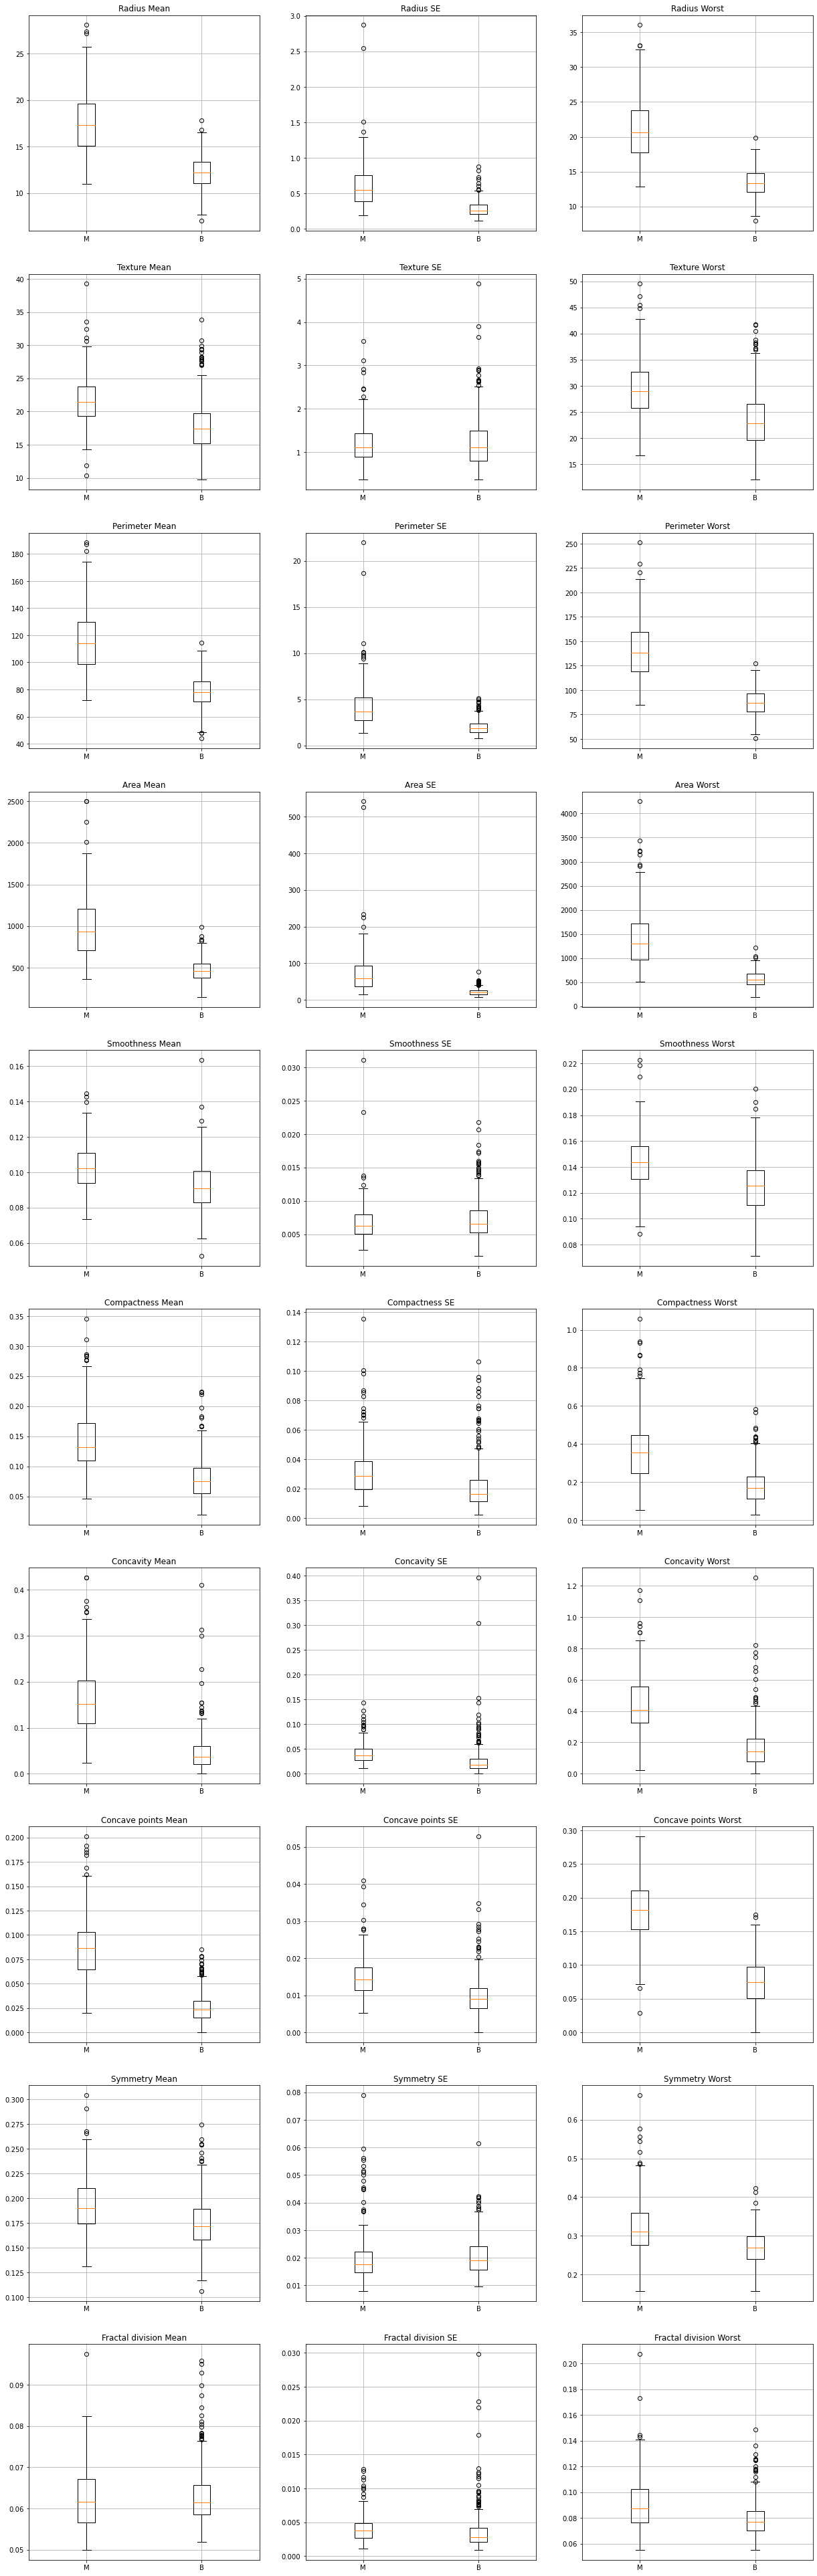

In [13]:
def plot_boxplot_feature_by_diagnosis(ax, feature_name):
    boxplot_data = [data.loc[data['Diagnosis']=='M', feature_name], data.loc[data['Diagnosis']=='B', feature_name]]
    ax.boxplot(boxplot_data)
    ax.set_xticks([1, 2], ['M', 'B'])
    ax.set_title(feature_name)
    ax.grid()

fig, ax = plt.subplots(10, 3, figsize=(21, 70))
for i, column_name in enumerate(data.columns[1:]):
    plt_row = i % 10
    plt_col = int(i / 10)
    plot_boxplot_feature_by_diagnosis(ax[plt_row, plt_col], column_name)

Većina značajki ima stršeće vrijednosti. Mi nećemo ništa poduzimati u vezi toga, npr. izbacivati takve vrijednosti. Bitno je to imati na umu dok analiziramo podatke.

### Korelacijska matrica

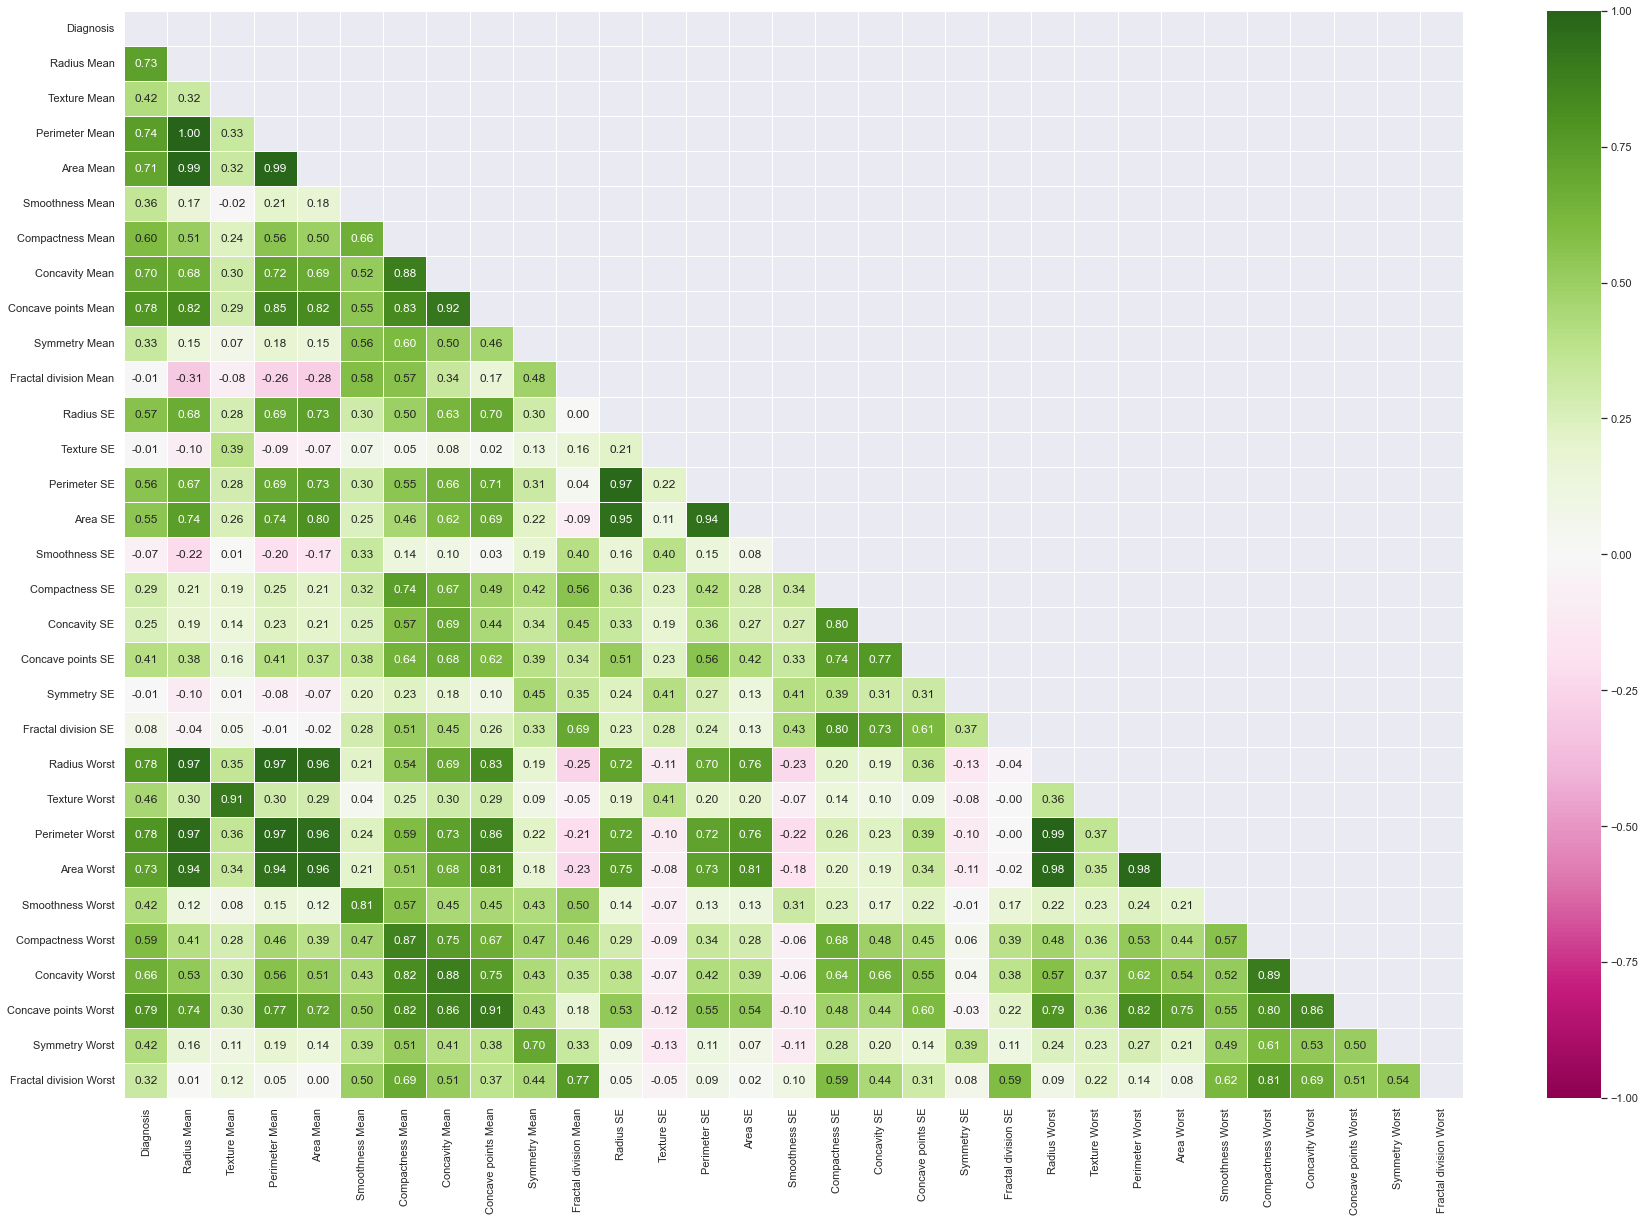

In [86]:
sns.set(rc={'figure.figsize':(30,20)})
mask = np.triu(np.ones((31, 31)))
sns.heatmap(data_with_numeric_diagnosis.corr(), mask=mask, annot=True, fmt=".2f", cmap="PiYG", linewidths=.5, vmin=-1.0, vmax=1.0)
plt.show()

Ova matrica prikazuje korelacije između svih parova značajki.

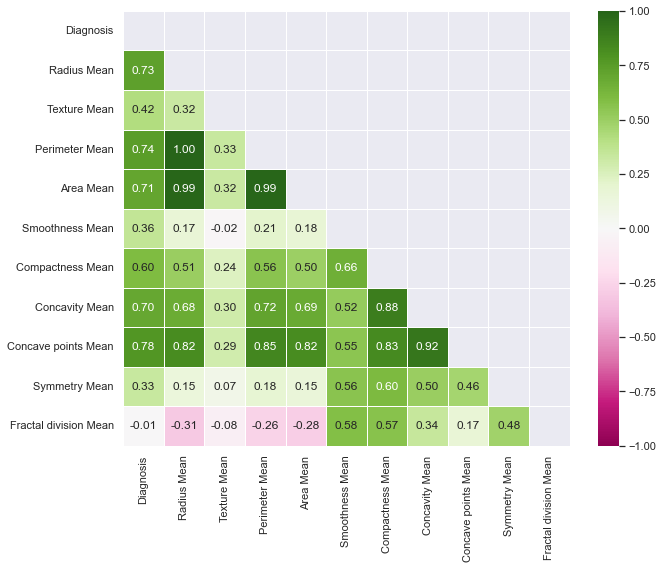

In [87]:
sns.set(rc={'figure.figsize':(10,8)})
mask = np.triu(np.ones((11, 11)))
sns.heatmap(data_with_numeric_diagnosis.iloc[:, 0:11].corr(), mask=mask, annot=True, fmt=".2f", cmap="PiYG", linewidths=.5, vmin=-1.0, vmax=1.0)
plt.show()

Ova korelacijska matrica prikazuje korelacije između srednjih vrijednosti i dijagnoze.

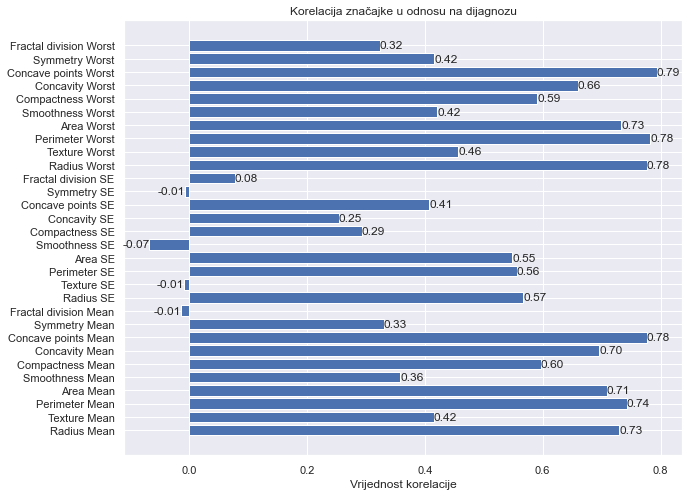

In [77]:
corr_with_respect_to_diagnosis = data_with_numeric_diagnosis.corrwith(data_with_numeric_diagnosis['Diagnosis'])
corr_values = corr_with_respect_to_diagnosis.values[1:]
corr_labels = corr_with_respect_to_diagnosis.index.values[1:]

fig, ax = plt.subplots()
y_pos = np.arange(len(corr_values))
hbars = ax.barh(y_pos, corr_values, align='center')
ax.set_yticks(y_pos, labels=corr_labels)
ax.set_title('Korelacija značajke u odnosu na dijagnozu')
ax.set_xlabel('Vrijednost korelacije')
ax.bar_label(hbars, fmt='%.2f')
plt.show()

Ovaj barplot prikazuje kolika je korelacija značajki u odnosu na dijagnozu.

### Scatter plot

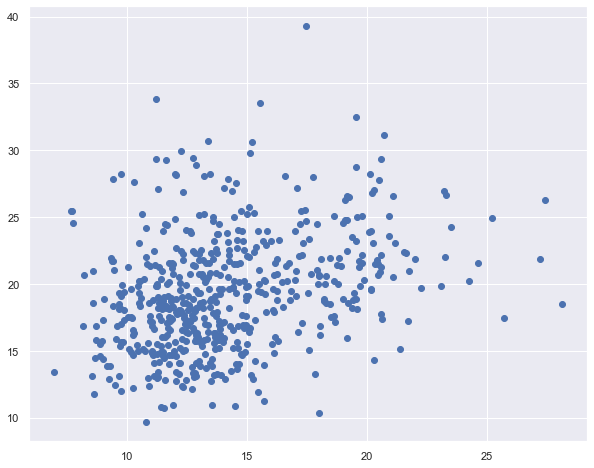

In [88]:
plt.scatter(data.loc[:, 'Radius Mean'], data.loc[:, 'Texture Mean'])